# **Análise dos dados do COVID-19**

**COVID-19** é o nome da doença causada pelo novo coronavírus(Sars-Cov-2).

O mundo está em quarentena na tentativa de reduzir a disseminação e o número de mortes resultantes da COVID-19. Diante desse quadro, várias instituições estão trabalhando para encontrar formas de vencer a crise atual. 


Como a Johns Hopkins University, que mantém uma atualização diária de um repositório no github com dados numéricos sobre a proliferação da doença. 


Neste repositório é possível baixar dados para desenvolver projetos e soluções de Data Science.

https://github.com/CSSEGISandData/COVID-19


A Johns Hopkins University também fornece um dashboard interativo mostrando o progresso da COVID-19.

https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

Neste notebook, analiso os dados diários disponibilizados em 29/03/2020, com o objetivo de ver quais insights podem ser extraídos a partir de dados brutos.



# **Obtenção dos Dados**

Todos os dados usados aqui foram obtidos a partir do repositório  https://github.com/CSSEGISandData/COVID-19. Este repositório é mantido pela Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).

Para esta análise exploratória, será baixado apenas o seguinte arquivo:
*   03-29-2020.csv - Dado diário do COVID-19 de 29/03/2020.

In [0]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
#importar o arquivo 03-29-2020.csv para um dataframe
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv")

## Preparação dos dados

In [0]:
#visualizando a primeira linha de dados
df.head(1)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-29 23:08:25,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"


In [0]:
#deletando colunas não desejadas
del df['FIPS']
del df['Admin2']
del df['Combined_Key']

#renomeando colunas
df.columns = ['Province_State', 'Country_Region', 'Last_Update', 'Latitude', 'Longitude', 'Confirmed', 'Deaths', 'Recovered', 'Active']

df.head(1)

,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active
0,South Carolina,US,2020-03-29 23:08:25,34.223334,-82.461707,3,0,0,0


**Análise dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

*   `Province_State` - estado ou província com incidência da COVID-19
*   `Country_Region` - país ou região com incidência da COVID-19
*   `Last_Update` - data da última atualização dos dados
*   `Latitude` - coordenada de latitude de incidência da COVID-19
*   `Longitude` - coordenada de longitude de incidência da COVID-19
*   `Confirmed` - número de casos confirmados
*   `Deaths` - número de mortes causadas pela COVID-19
*   `Recovered` - número de casos recuperados
*   `Active` - número de casos ativos

In [0]:
print('total de países: ', len(df['Country_Region'].unique())) #177 países
#df['Country_Region'].unique()

#5 primeiras entradas
df.head()

total de países:  177


,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active
0,South Carolina,US,2020-03-29 23:08:25,34.223334,-82.461707,3,0,0,0
1,Louisiana,US,2020-03-29 23:08:25,30.295065,-92.414197,9,1,0,0
2,Virginia,US,2020-03-29 23:08:25,37.767072,-75.632346,3,0,0,0
3,Idaho,US,2020-03-29 23:08:25,43.452658,-116.241552,92,1,0,0
4,Iowa,US,2020-03-29 23:08:25,41.330756,-94.471059,1,0,0,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o conjunto de dados possui? Quais os tipos das variáveis?**

In [0]:
#volume de dados do DataFrame
print("Entradas: ", df.shape[0])
print("Variáveis: ", df.shape[1], "\n")

display(df.dtypes)

Entradas:  3434
Variáveis:  9 



Province_State     object
Country_Region     object
Last_Update        object
Latitude          float64
Longitude         float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* A variável `Province_state` tem aproximadamente 5% dos seus valores nulos.


In [0]:
#ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Province_State    0.050379
Active            0.000000
Recovered         0.000000
Deaths            0.000000
Confirmed         0.000000
Longitude         0.000000
Latitude          0.000000
Last_Update       0.000000
Country_Region    0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe59e818f60>,
      dtype=object)

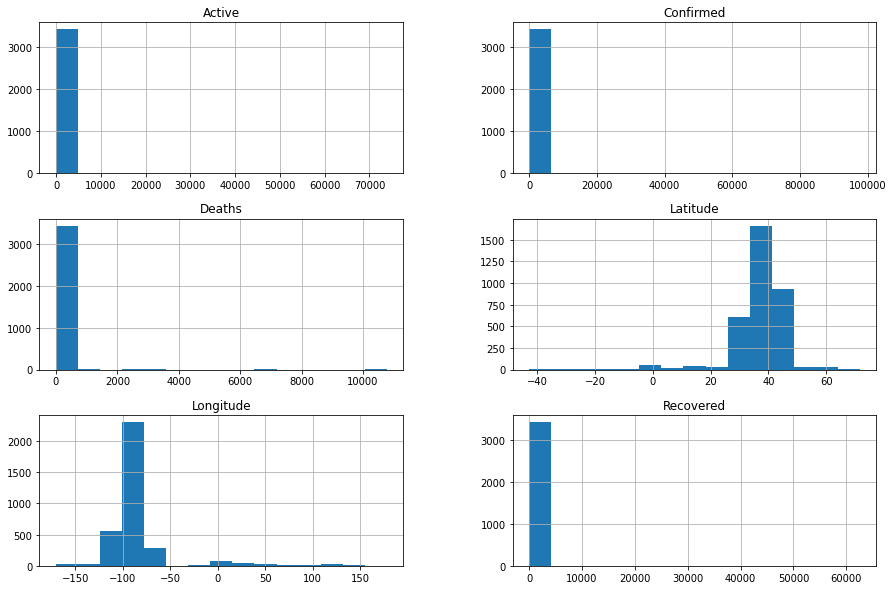

In [0]:
#gráfico das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Por exemplo, variável `Deaths`.

Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

*   Resumo estatístico por meio do método `describe()`
*   Plotar `boxplots` para a variável

In [0]:
#resumo estatístico das variáveis numéricas
df[['Active', 'Confirmed', 'Deaths', 'Recovered']].describe()

,Active,Confirmed,Deaths,Recovered
count,3434.000000,3434.000000,3434.000000,3434.000000
mean,115.202679,209.702097,9.879150,43.413512
std,2024.521259,2956.173537,234.856826,1161.782648
min,-6.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000
75%,0.000000,10.000000,0.000000,0.000000
max,73880.000000,97689.000000,10779.000000,62570.000000


Olhando o resumo estatístico acima, é possível confirmar algumas hipóteses como:

*   A variável `Deaths` possui 75% do valor abaixo de 0, porém seu valor máximo é 10779.
*   A variável `Confirmed` possui 75% do valor abaixo de 10, porém seu valor máximo é 97689.

**Boxplot para Active**

Active
valores acima de 300:  74
2.1549%


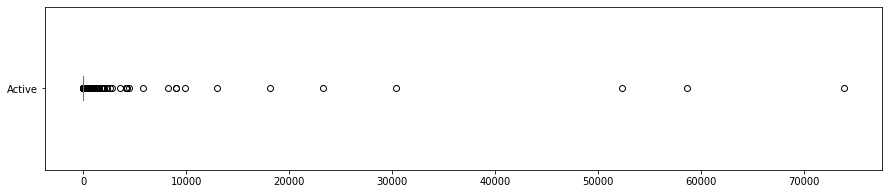

In [0]:
#Active
df.Active.plot(kind='box', vert=False, figsize=(15, 3))

#ver quantidade de valores acima de 300
print("Active\nvalores acima de 300: ", len(df[df.Active > 300]))

print("{:.4f}%".format((len(df[df.Active > 300]) / df.shape[0])*100))

**Boxplot para Confirmed**

Confirmed
valores acima de 500:  115
3.3489%


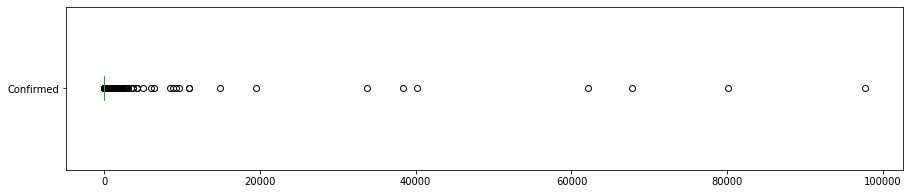

In [0]:
#Confirmed
df.Confirmed.plot(kind='box', vert=False, figsize=(15, 3))

#ver quantidade de valores acima de 500
print("Confirmed\nvalores acima de 500: ", len(df[df.Confirmed > 500]))

print("{:.4f}%".format((len(df[df.Confirmed > 500]) / df.shape[0])*100))

**Boxplot para Deaths**

Deaths
valores acima de 100:  19
0.5533%


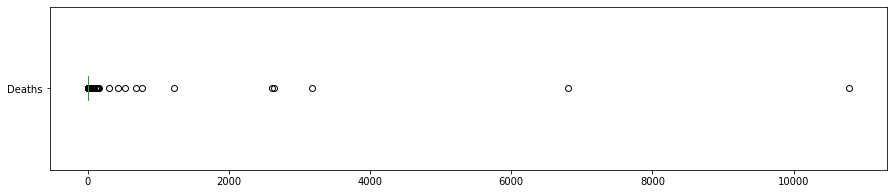

In [0]:
#Deaths
df.Deaths.plot(kind='box', vert=False, figsize=(15, 3))

#ver quantidade de valores acima de 100
print("Deaths\nvalores acima de 100: ", len(df[df.Deaths > 100]))

print("{:.4f}%".format((len(df[df.Deaths > 100]) / df.shape[0])*100))

**Boxplot para Recovered**

Recovered
valores acima de 100:  51
1.4851%


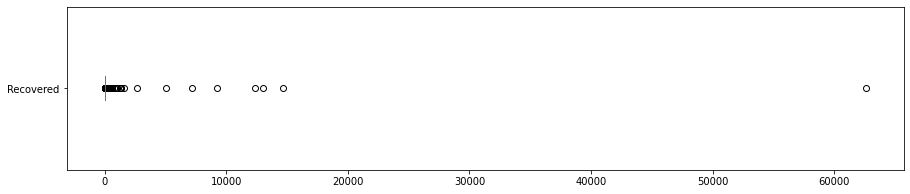

In [0]:
#Recovered
df.Recovered.plot(kind='box', vert=False, figsize=(15, 3))

#ver quantidade de valores acima de 100
print("Recovered\nvalores acima de 100: ", len(df[df.Recovered > 100]))

print("{:.4f}%".format((len(df[df.Recovered > 100]) / df.shape[0])*100))

**Histograma sem outliers**

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

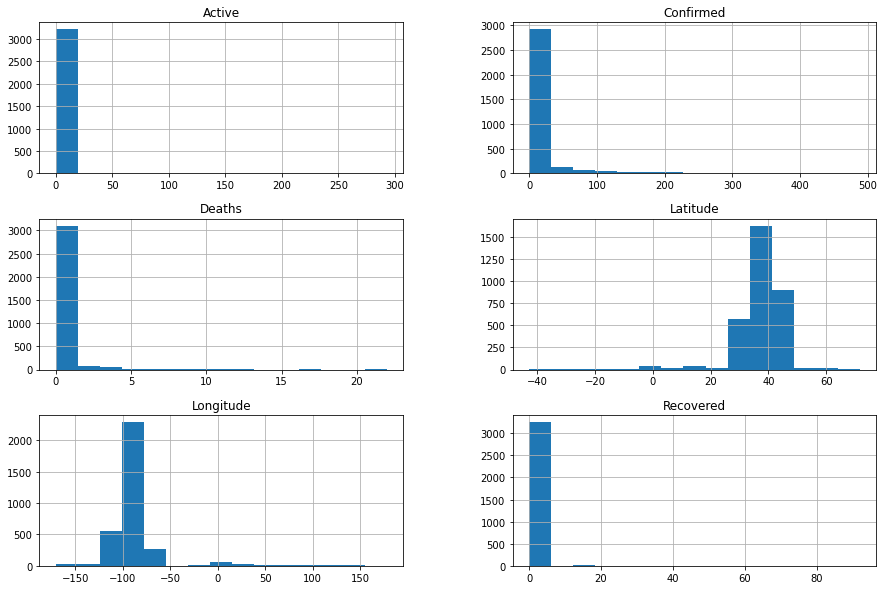

In [0]:
#fazer uma cópia do dataFrame e remover os outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.Active > 300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.Confirmed > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.Deaths > 100].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.Recovered > 100].index, axis=0, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


### **Q5. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No contexto análisado, a busca é por uma relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

*   Criar uma matriz de correlação
*   Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`



In [0]:
#criar uma matriz de correlação
corr= df_clean[['Active','Confirmed','Deaths', 'Recovered']].corr()

display(corr)

,Active,Confirmed,Deaths,Recovered
Active,1.000000,0.378888,0.266724,0.422422
Confirmed,0.378888,1.000000,0.650307,0.214398
Deaths,0.266724,0.650307,1.000000,0.114586
Recovered,0.422422,0.214398,0.114586,1.000000


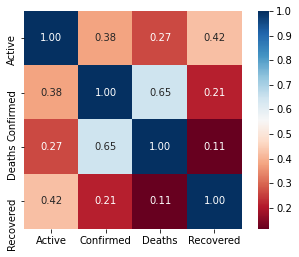

In [0]:
#gerar heatmap a partir da matriz
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [0]:
#média de ativos no dia por país no dataFrame sem outliers
df_clean.groupby(['Country_Region']).Active.mean().sort_values(ascending=False)[:10]

Country_Region
Taiwan*            266.0
Kazakhstan         263.0
Moldova            259.0
North Macedonia    250.0
Jordan             238.0
San Marino         196.0
Cyprus             194.0
Azerbaijan         190.0
Kuwait             188.0
Burkina Faso       187.0
Name: Active, dtype: float64

In [0]:
#ver a única entrada de Taiwan
df_clean[df.Country_Region == "Taiwan*"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active
3415,NaN,Taiwan*,2020-03-29 08:04:48,23.7,121.0,298,2,30,266


In [0]:
#média de ativos no dia por país no dataFrame original
df.groupby(['Country_Region']).Active.mean().sort_values(ascending=False)[:10]

Country_Region
Italy           73880.0
Spain           58598.0
Germany         52351.0
Iran            23278.0
Switzerland     12934.0
Belgium          9046.0
Turkey           8981.0
Austria          8223.0
Portugal         5800.0
Korea, South     4398.0
Name: Active, dtype: float64

In [0]:
#ver a quantidade de entradas de Italy no dataFrame original
print(df[df.Country_Region == "Italy"].shape)

#ver a única entrada de Italy
df[df.Country_Region == "Italy"]

(1, 9)


,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active
3340,NaN,Italy,2020-03-29 23:08:13,41.87194,12.56738,97689,10779,13030,73880


### **Q6. Qual o total de casos ativos?**

In [0]:
#total de ativos
df['Active'].sum()

395606

### **Q7. Qual o total de casos recuperados?**

In [0]:
#total de recuperados
df['Recovered'].sum()

149082

### **Q8. Qual o total de mortes?**

In [0]:
#total de mortes
df['Deaths'].sum()

33925

### **Q9. Qual o total de casos confirmados?**

In [0]:
#total de casos confirmados
df['Confirmed'].sum()

720117

### **Q10. Quais são os países presentes no dataframe?**

In [0]:
#países presentes no Dataframe
df.Country_Region.unique()


array(['US', 'Canada', 'United Kingdom', 'China', 'Netherlands',
       'Australia', 'Denmark', 'France', 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Chile',
       'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 

Como são fornecidas as Latitudes e Longitudes dos países, é possível plotar cada ponto de acordo com o número de casos confirmados, por exemplo. 
Para isso considera-se x=`longitude` e y=`latitude`.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

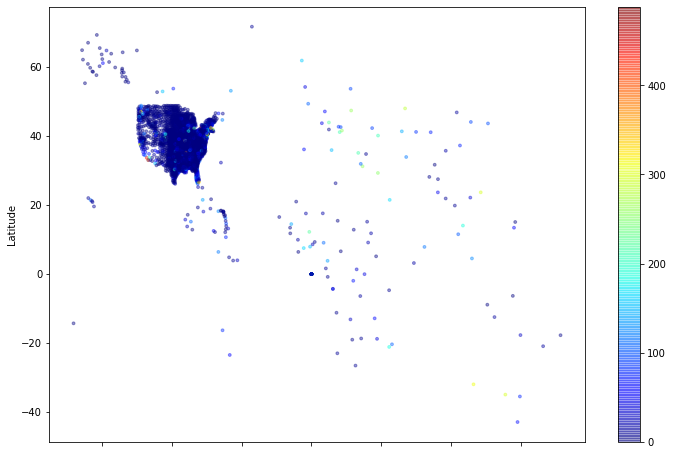

In [0]:
#casos confirmados
df_clean.plot(kind="scatter", x='Longitude', y='Latitude', alpha=0.4, c=df_clean['Confirmed'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8))

## Conclusões

Foi feita apenas uma análise superficial na base de dados da Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE), porém já se percebeu que existem *outliers* em algumas das variáveis.
